### 0.데이터 다운로드


In [38]:
!git clone https://github.com/Soyoung-Yoon/data_02

'data_02'에 복제합니다...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 72 (delta 7), reused 0 (delta 0), pack-reused 47
오브젝트를 받는 중: 100% (72/72), 448.82 KiB | 20.40 MiB/s, 완료.
델타를 알아내는 중: 100% (18/18), 완료.


In [ ]:
import scipy
scipy.__version__

In [ ]:
!pip install scipy==1.6.0

### 1.카이제곱 적합도 검정

####1-1.특정비율
A학급 40명의 혈액형 비율을 A, B, O, AB 각각 20%, 20%, 30%, 30%로 예상하였다. 실제 측정 결과 16, 16, 4, 4 명인 경우의 적합도 검정을 수행하여 보자


- 𝑯_𝟎 : 변수의 분포가 기대 분포와 같다
- 𝑯_𝟏 : 변수의 분포가 기대 분포와 같지 않다


In [1]:
# [파일로 주어진 경우 직접 개수 계산]
import pandas as pd
data = {'blood_type': ['A']*16 + ['B']*16 + ['C']*4 + ['D']*4}
data = pd.DataFrame(data)
observed = None
print(observed)

None


In [21]:
import numpy as np
from scipy.stats import chisquare

observed = data['blood_type'].value_counts().to_numpy()
expected = sum(observed) * np.array([0.2, 0.2, 0.3, 0.3])

s, pvalue = chisquare(f_obs=observed, f_exp=expected)
print(f'[𝓧² 적합도 검정] statistics= {s:.4f}, p-value= {pvalue:.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[𝓧² 적합도 검정] statistics= 26.6667, p-value= 0.0000 -> H₀기각


#### 1-2.동일비율
4개의 범주에 대해 동일한 비율이라고 가정하고, 실제측정 한 표본 분포가 다음과 같을 때, 카이제곱 적합도 검정을 수행하여 보자

        observed = [54, 46, 60, 40]


- 𝑯_𝟎 : 변수의 분포에 비율 차이가 없다.
- 𝑯_𝟏 : 변수의 분포에 비율 차이가 있다.

In [22]:
from scipy.stats import chisquare
import numpy as np

observed = [54, 46, 60, 40]
expected = sum(observed) * np.array([0.25, 0.25, 0.25, 0.25])

s, pvalue = chisquare(f_obs=observed, f_exp=expected)
print(f'[𝓧² 적합도 검정] statistics= {s:.4f}, p-value= {pvalue:.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[𝓧² 적합도 검정] statistics= 4.6400, p-value= 0.2001 -> H₀채택


### 2.카이제곱 동질성/독립성 검정
- 두 범주형 자료 간의 차이를 분석하는 검증 방법
- 관찰빈도(실제값)가 기대빈도(기댓값)와 유의한 차이가 있는지 검증
- 관찰빈도는 절대적 수치로만 관찰되어야 함, 기대빈도의 합과 관찰빈도의 합은 같음
- 분할표의 칸 수 및 각 칸의 기대빈도는 5이상 이어야 함
- 귀무가설이 기각되면 범주별 기대빈도와 관측빈도의 차이가 충분히 크다고 말할 수 있음
- 기대빈도와 관찰빈도의 차이가 커지면 카이제곱 통계량도 커짐


#### 2-1.카이제곱 동질성 검정
- H0 : 성별별 핸드폰 모델 선호도 분포는 같다
- H1 : 성별별 핸드폰 모델 선호도 분포가 같지 않다

In [24]:
import pandas as pd

crs_table = pd.DataFrame([[10, 40, 50], [30, 60, 10]], 
                         index=['M', 'F'], 
                columns=['model_A', 'model_B', 'model_C'])
print(crs_table)

   model_A  model_B  model_C
M       10       40       50
F       30       60       10


In [37]:
from scipy.stats import chi2_contingency

observed = crs_table.copy()

s, pvalue, dof, expected = chi2_contingency(observed)
print(f'[𝓧² 동질성 검정] statistics= {s:.4f}, p-value= {pvalue:.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
print(f'[𝓧² 동질성 검정] expected= ', pd.DataFrame(expected, index=observed.index, columns=observed.columns), sep='\n')
print(f'[𝓧² 동질성 검정] observed= ', observed, sep='\n')

[𝓧² 동질성 검정] statistics= 40.6667, p-value= 0.0000 -> H₀기각
[𝓧² 동질성 검정] expected= 
   model_A  model_B  model_C
M     20.0     50.0     30.0
F     20.0     50.0     30.0
[𝓧² 동질성 검정] observed= 
   model_A  model_B  model_C
M       10       40       50
F       30       60       10


####2-2.카이제곱 독립성 검정
- 귀무가설 : 당뇨와 비만 사이에 관계는 독립이다.
- 대립가설 : 당뇨와 비만 사이에 관계는 독립이 아니다.

In [39]:
# [1] 데이터 가져오기
import pandas as pd
data = pd.read_csv("data_02/data_chi.csv")
print(data)

   당뇨 여부 비만 여부
0      Y     N
1      N     Y
2      N     N
3      N     N
4      N     Y
..   ...   ...
95     N     N
96     N     N
97     Y     N
98     N     N
99     N     N

[100 rows x 2 columns]


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   당뇨 여부   100 non-null    object
 1   비만 여부   100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [41]:
data.head(2)

,당뇨 여부,비만 여부
0,Y,N
1,N,Y


In [43]:
# [2] 카이제곱 분석을 위한 분할표 만들기
observed = pd.crosstab(index=data['당뇨 여부'], columns=data['비만 여부'])

In [46]:
# [3] 카이스퀘어 분석
from scipy.stats import chi2_contingency

s, pvalue, _, expected = chi2_contingency(observed)
print(f'[𝓧² 동질성 검정] statistics= {s:.4f}, p-value= {pvalue:.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
print(f'[𝓧² 동질성 검정] expected= ', pd.DataFrame(expected, index=observed.index, columns=observed.columns), sep='\n')
print(f'[𝓧² 동질성 검정] observed= ', observed, sep='\n')

[𝓧² 동질성 검정] statistics= 0.0000, p-value= 1.0000 -> H₀채택
[𝓧² 동질성 검정] expected= 
비만 여부      N      Y
당뇨 여부              
N      62.16  21.84
Y      11.84   4.16
[𝓧² 동질성 검정] observed= 
비만 여부   N   Y
당뇨 여부        
N      62  22
Y      12   4


In [ ]:
# [4] 결론


#### 2-3.피셔의 정확검정
- 만약 사건 발생 수, 빈도 수가 극히 적거나(특히 5개 이하의 빈도가 전체 셀 중 20%이상 존재하는 경우) 서로의 빈도 수의 차이가 많이나는 경우에는 카이제곱 검정의 정확도는 낮아집니다. 
- 이때 필요한 검정이 바로 '피셔의 정확검정'입니다.

가설설정
- 귀무가설 : 약과 효과의 관계는 독립이다. 
- 대립가설 : 약과 효과의 관계가 독립이 아니다.

In [47]:
import pandas as pd
from scipy.stats import fisher_exact

# [1] 분할표 생성
data = pd.DataFrame([[1, 6], [5, 2]])
data.columns = ['가짜 약','진짜 약']
data.index = ['효과있음', '효과없음']
print(data)

      가짜 약  진짜 약
효과있음     1     6
효과없음     5     2


In [50]:
# [2] 피셔 검정
from scipy.stats import fisher_exact

s, pvalue = fisher_exact(data, alternative='two-sided')
print(f'[Fisher Exact Test] statistics= {s:.4f}, p-value= {pvalue:.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[Fisher Exact Test] statistics= 0.0667, p-value= 0.1026 -> H₀채택


In [51]:
# [3] 결과
# 독립성 테스트 : 연관이 없다 == 독립이다

####2-4.아내와 남편의 집안일
- 귀무가설 : 집안일의 종류와 수행하는 사람의 관계는 독립이다.
- 대립가설 : 집안일의 종류와 수행하는 사람의 관계가 독립이 아니다.

In [53]:
# [1] crosstable 형태의 데이터 읽기
import pandas as pd

data = pd.read_csv('./data_02/housetasks.csv', index_col=0)
print(data.shape)
print(data.info())

(13, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Laundry to Holidays
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Wife         13 non-null     int64
 1   Alternating  13 non-null     int64
 2   Husband      13 non-null     int64
 3   Jointly      13 non-null     int64
dtypes: int64(4)
memory usage: 520.0+ bytes
None


In [54]:
data.head(2)

,Wife,Alternating,Husband,Jointly
Laundry,156,14,2,4
Main_meal,124,20,5,4


In [57]:
# [2] 카이제곱 독립성 검정
from scipy.stats import chi2_contingency

s, pvalue, dof, expected = chi2_contingency(observed=data)
print(f'[𝓧² 동질성 검정] statistics= {s:.4f}, p-value= {pvalue:.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')
print(f'[𝓧² 동질성 검정] expected= ', pd.DataFrame(expected, index=data.index, columns=data.columns), sep='\n')
print(f'[𝓧² 동질성 검정] observed= ', data, sep='\n')

[𝓧² 동질성 검정] statistics= 1944.4562, p-value= 0.0000 -> H₀기각
[𝓧² 동질성 검정] expected= 
                 Wife  Alternating    Husband    Jointly
Laundry     60.550459    25.633028  38.449541  51.366972
Main_meal   52.637615    22.283257  33.424885  44.654243
Dinner      37.155963    15.729358  23.594037  31.520642
Breakfeast  48.165138    20.389908  30.584862  40.860092
Tidying     41.972477    17.768349  26.652523  35.606651
Dishes      38.876147    16.457569  24.686353  32.979931
Shopping    41.284404    17.477064  26.215596  35.022936
Official    33.027523    13.981651  20.972477  28.018349
Driving     47.821101    20.244266  30.366399  40.568234
Finances    38.876147    16.457569  24.686353  32.979931
Insurance   47.821101    20.244266  30.366399  40.568234
Repairs     56.766055    24.030963  36.046445  48.156537
Holidays    55.045872    23.302752  34.954128  46.697248
[𝓧² 동질성 검정] observed= 
            Wife  Alternating  Husband  Jointly
Laundry      156           14        2        4
M

In [58]:
# [3] 결과
# 독립성 분석: 연관성이 없다(H0 기각) = 연관성이 있다 = 독립이 아니다

####2-5.분류 모델에서 활용
- 2개 범주형 변수의 관계에 대해 검정한다

In [59]:
# [1] 파일 불러오기
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/1st_Train.csv')
X = data.drop(columns=['Reached.on.Time_Y.N'])
Y = data[['ID', 'Reached.on.Time_Y.N']]

In [60]:
print([x.shape for x in [X, Y]])

[(10999, 11), (10999, 2)]


In [61]:
#[2] X,Y가 분리되어 있는 경우 병합하기
data = pd.merge(X, Y, on='ID')

#[3] 컬럼별 값의 가짓수 확인하기
data.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [65]:
#[4] 범주형 변수 확인하기 
# (설명을 보고 확인하는 것이 정확함)
for x_feature in ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Customer_rating', 'Customer_care_calls', 'Prior_purchases']:
    print(data[x_feature].value_counts())

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64
F    5545
M    5454
Name: Gender, dtype: int64
3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64
3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64


- (독립)범주형 변수 : 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Customer_rating', 'Customer_care_calls', 'Prior_purchases'
- (종속)범주형 변수 : 'Reached.on.Time_Y.N'
- 귀무가설 : 'Reached.on.Time_Y.N'과 feature는 독립이다. (연관성이 없다.)
- 대립가설 : 'Reached.on.Time_Y.N'과 feature는 독립이 아니다. (연관성이 있다.)


In [97]:
# [5] 카이제곱 독립성 검정
from scipy.stats import chi2_contingency

x_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Customer_rating', 'Customer_care_calls', 'Prior_purchases']
y_feature = 'Reached.on.Time_Y.N'

for x_feature in x_features:
    observed = pd.crosstab(index=data[y_feature], columns=data[x_feature])
    s, pvalue, dof, expected = chi2_contingency(observed)
    print(f'{y_feature:19s} - {x_feature:20s} = {s:9.4f}/{pvalue:.4f} -> {"연관" if pvalue < 0.05 else "독립"}')

Reached.on.Time_Y.N - Warehouse_block      =    1.0894/0.8960 -> 독립
Reached.on.Time_Y.N - Mode_of_Shipment     =    0.7434/0.6895 -> 독립
Reached.on.Time_Y.N - Product_importance   =   12.2112/0.0022 -> 연관
Reached.on.Time_Y.N - Gender               =    0.2231/0.6367 -> 독립
Reached.on.Time_Y.N - Customer_rating      =    3.2000/0.5249 -> 독립
Reached.on.Time_Y.N - Customer_care_calls  =   54.2737/0.0000 -> 연관
Reached.on.Time_Y.N - Prior_purchases      =  125.9221/0.0000 -> 연관


In [98]:
# [6] 결론
data.corr(numeric_only=True)[y_feature]

ID                    -0.411822
Customer_care_calls   -0.067126
Customer_rating        0.013119
Cost_of_the_Product   -0.073587
Prior_purchases       -0.055515
Discount_offered       0.397108
Weight_in_gms         -0.268793
Reached.on.Time_Y.N    1.000000
Name: Reached.on.Time_Y.N, dtype: float64

In [ ]:
def my_chi2(data, feature, target):
    pass


### 3.Wilcoxon Signed Rank Test
- 일표본/대응표본 T검정에서 정규성 가정이 만족되지 않을 때 사용하는 비모수 검정법
- 일표본/대응표본 T검정과는 달리 **중앙값에 관한 결과를 얻을 수 있음**.
- 가정
  1. 표본은 동일한 모집단에서 추출되어야 한다.
  2. 표본은 임의, 독립적으로 추출되어야 한다.

#### 3-1.일표본(One Sample)
- alternative='two-sided'
   - H0: 모집단의 중앙값은 A 이다.
   - H1: 모집단의 중앙값은 A가 아니다.
- alternative='less'
   - H0: 모집단의 중앙값은 A보다 크거나 같다.
   - H1: 모집단의 중앙값은 A보다 작다.
- alternative='greater'
   - H0: 모집단의 중앙값은 A보다 작거나 같다.
   - H1: 모집단의 중앙값은 A보다 크다.    

중량이 100g 으로 표기된 닭가슴살 제품이 100g이라고 할 수 있는가?
- 동일한 회사 제품을 임의로 9개 표본 추출하였음
- 통계적 유의수준은 0.05로 사용함
- H0: 닭 가슴살 중량의 중앙값은 100g이다
- H1: 닭 가슴살 중량의 중앙값은 100g이 아니다

In [99]:
# [1] 데이터 가져오기
import pandas as pd
df = pd.read_csv('./data_02/chicken_breast.csv')
print(df)

       weight
0  107.704526
1   96.505220
2  109.417631
3  109.696405
4   90.783694
5  107.871426
6  106.447983
7  104.484894
8   95.778403


In [100]:
df.head(2)

,weight
0,107.704526
1,96.505220


In [101]:
df.shape

(9, 1)

In [104]:
# [2] 중앙값 구하기
print(f"{df['weight'].median():.4f}")

106.4480


In [108]:
# [3] 윌콕슨 검정 실행
from scipy.stats import wilcoxon

s, pvalue = wilcoxon(df['weight']-100, alternative='two-sided')
print(f'[Wilcoxon Signed Rank Test] statistics= {s:.4f}, p-value= {pvalue:.4f}')

[Wilcoxon Signed Rank Test] statistics= 10.0000, p-value= 0.1641 -> H₀채택


In [109]:
# [4] 결과
print(f'{"H₀기각" if pvalue < 0.05 else "H₀채택"}')

H₀채택


alternative='less'
- H0: 닭가슴살 중량의 중앙값은 100 보다 크거나 같다.
- H1: 닭가슴살 중량의 중앙값은 100 보다 작다.

In [110]:
from scipy.stats import wilcoxon

s, pvalue = wilcoxon(df['weight']-100, alternative='less')
print(f'[Wilcoxon Signed Rank Test] statistics= {s:.4f}, p-value= {pvalue:.4f}')
print(f'{"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[Wilcoxon Signed Rank Test] statistics= 35.0000, p-value= 0.9355
H₀채택


alternative='greater'
- H0: 닭가슴살 중량의 중앙값은 100 보다 작거나 같다.
- H1: 닭가슴살 중량의 중앙값은 100 보다 크다.

In [124]:
from scipy.stats import wilcoxon

s, pvalue = wilcoxon(df['weight']-100, alternative='greater')
print(f'[Wilcoxon Signed Rank Test] statistics= {s:.4f}, p-value= {pvalue:.4f}')
print(f'{"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[Wilcoxon Signed Rank Test] statistics= 35.0000, p-value= 0.0820
H₀채택


In [122]:
from scipy.stats import t, sem

t.interval(confidence=0.95, loc=df['weight'].mean(), scale=sem(df['weight']), df=len(df)-1)

(97.82610410493852, 108.5494920758267)

#### 3-2.대응표본(Paired)
- alternative='two-sided'
    - H0: 값 차이(처리후 - 처리전)의 중앙값이 0이다(=값의 차이가 없다)
    - H1: 값 차이(처리후 - 처리전)의 중앙값이 0이 아니다(=값의 차이가 있다)
- alternative='less'
    - H0: 값 차이(처리후 - 처리전)의 중앙값이 0보다 크거나 같다
    - H1: 값 차이(처리후 - 처리전)의 중앙값이 0보다 작다
- alternative='greater'
    - H0: 값 차이(처리후 - 처리전)의 중앙값이 0보다 작거나 같다
    - H1: 값 차이(처리후 - 처리전)의 중앙값이 0보다 크다 

다이어트 후, 체중이 줄었다고 할 수 있는가? 몸무게 : 비율척도
- 동일한 회사 제품을 임의로 8개 표본 추출하였음
- 통계적 유의수준은 0.05로 사용함


alternative='less'
- H0: 다이어트 후 - 다이어트 전 몸무게 중앙값은 0보다 크거나 같다 
- H1: 다이어트 후 - 다이어트 전 몸무게 중앙값은 0보다 작다.

In [125]:
# [1] 파일 불러오기
import pandas as pd
df = pd.read_csv('./data_02/diet_result.csv')
print(df)

      before      after
0  60.038972  56.153355
1  58.566940  55.678046
2  62.200320  63.010597
3  68.522263  64.413353
4  54.802465  52.110032
5  55.437637  51.330742
6  64.700073  62.047727
7  65.030917  61.157653


In [ ]:
# scipy.stats.wilcoxon(x, y=None, zero_method='wilcox', correction=False, alternative='two-sided', mode='auto')
# The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. 
# In particular, it tests whether the distribution of the differences x - y is symmetric about zero.
# It is a non-parametric version of the paired T-test.

In [134]:
for x_feature in ['after', 'before']:
    print(f'{x_feature:7s} - median: {df[x_feature].median():,.4f}')

after   - median: 58.6555
before  - median: 61.1196


In [129]:
# [2] wilcoxon sign rank sum - (paired t-test의 비모수)
from scipy.stats import wilcoxon

s, pvalue = wilcoxon(df['after'], df['before'], alternative='less')
print(f'[Wilcoxon Signed Rank Test] statistics= {s:.4f}, p-value= {pvalue:.4f}')

[Wilcoxon Signed Rank Test] statistics= 1.0000, p-value= 0.0078


In [130]:
# [3] 결과
print(f'{"H₀기각" if pvalue < 0.05 else "H₀채택"}')

H₀기각


alternative='two-sided'
- H0: 다이어트 후 - 다이어트 전 몸무게 중앙값은 0과 같다 
- H1: 다이어트 후 - 다이어트 전 몸무게 중앙값은 0과 다르다

In [131]:
from scipy.stats import wilcoxon

s, pvalue = wilcoxon(df['after'], df['before'], alternative='two-sided')
print(f'[Wilcoxon Signed Rank Test] statistics= {s:.4f}, p-value= {pvalue:.4f}')
print(f'{"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[Wilcoxon Signed Rank Test] statistics= 1.0000, p-value= 0.0156
H₀기각


alternative='greater'
- H0: 다이어트 후 - 다이어트 전 몸무게 중앙값은 0보다 작거나 같다 
- H1: 다이어트 후 - 다이어트 전 몸무게 중앙값은 0보다 크다

In [132]:
from scipy.stats import wilcoxon

s, pvalue = wilcoxon(df['after'], df['before'], alternative='greater')
print(f'[Wilcoxon Signed Rank Test] statistics= {s:.4f}, p-value= {pvalue:.4f}')
print(f'{"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[Wilcoxon Signed Rank Test] statistics= 1.0000, p-value= 0.9961
H₀채택


###4.독립 2표본(Two Sample)
- 독립 2표본 T검정에서 정규성 가정이 만족되지 않을 때 사용하는 비모수 검정법
- **두 표본의 중위수를 비교**하는데 쓰임
- 가정
   1. 두 그룹은 독립적이다
   2. 측정값은 최소 순서형 변수이다(대소 비교가 가능해야 함)

   

- alternative='two-sided'
    - H0: gA의 중앙값과 gB의 중앙값이 같다(차이가 없다)
    - H1: gA의 중앙값과 gB의 중앙값이 다르다(차이가 있다)
- alternative='less'
    - H0: gA의 중앙값이 gB의 중앙값보다 크거나 같다
    - H1: gA의 중앙값이 gB의 중앙값보다 작다
- alternative='greater'
    - H0: gA의 중앙값이 gB의 중앙값보다 작거나 같다
    - H1: gA의 중앙값이 gB의 중앙값보다 크다

#### 4-1.Wilcoxon Rank Sum Test

A사 닭가슴살 제품의 중량과 B사 닭가슴살 제품의 중량이 차이가 있는지 확인
- A사 닭가슴살은 40개의 표본, B사 닭가슴살은 20개의 표본이 있으며
- 각각 독립적이고 임의로 추출했다
- 통계적 유의수준은 0.05 사용


alternative='two-sided'
- H0: A사 닭가슴살 중량과 B사 닭가슴살 중량의 차이가 없다
- H1: A사 닭가슴살 중량과 B사 닭가슴살 중량의 차이가 있다

In [135]:
# [1] 파일 불러오기
import pandas as pd
df = pd.read_csv('data_02/chicken_weight_AB.csv')
df.head(2)

,company,weight
0,A,97.604131
1,A,95.963639


In [136]:
df.shape

(60, 2)

In [137]:
df['company'].unique()

array(['A', 'B'], dtype=object)

In [150]:
# [2] 그룹 나누기
groups = [ x for x in df.groupby('company')['weight']]

for name, x in groups:
    print(f'{name} - median= {x.median():,.4f}')

A - median= 99.9982
B - median= 109.9431


scipy.stats.ranksums(x, y, alternative='two-sided')
- Compute the Wilcoxon rank-sum statistic for two samples.
- The Wilcoxon rank-sum test tests the null hypothesis that two sets of measurements are drawn from the same distribution. 
- The alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample.
- This test should be used to compare two samples from continuous distributions. 
- It does not handle ties between measurements in x and y. For tie-handling and an optional continuity correction see scipy.stats.mannwhitneyu.

In [145]:
from scipy.stats import shapiro
from scipy.stats import levene

for name, x in groups:
    s, pvalue = shapiro(x)
    print(f'{name} - shapiro statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H0 기각" if pvalue < 0.05 else "H0 채택"}')

s, pvalue = levene(groups[0][1], groups[1][1], center='mean')
print(f'levene statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H0 기각" if pvalue < 0.05 else "H0 채택"}')

A - shapiro statistics= 0.9767, p-value= 0.5676 -> H0 채택
B - shapiro statistics= 0.7900, p-value= 0.0006 -> H0 기각
levene statistics= 352.5321, p-value= 0.0000 -> H0 기각


In [152]:
# [3] wilcoxon rank sum test (two sample)
from scipy.stats import ranksums

s, pvalue = ranksums(groups[0][1], groups[1][1], alternative='two-sided')
print(f'[Wilcoxon Signed Rank Sum Test] statistics= {s:.4f}, p-value= {pvalue:.4f}')

[Wilcoxon Signed Rank Sum Test] statistics= -4.8612, p-value= 0.0000


In [153]:
# [4] 결과
print(f'{"H₀기각" if pvalue < 0.05 else "H₀채택"}')

H₀기각


alternative='less'
- H0: A사 닭가슴살 중량이 B사 닭가슴살 중량보다 크거나 같다
- H1: A사 닭가슴살 중량이 B사 닭가슴살 중량보다 작다

In [154]:
# wilcoxon rank sum test (two sample)
from scipy.stats import ranksums

s, pvalue = ranksums(groups[0][1], groups[1][1], alternative='less')
print(f'[Wilcoxon Signed Rank Sum Test] statistics= {s:.4f}, p-value= {pvalue:.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[Wilcoxon Signed Rank Sum Test] statistics= -4.8612, p-value= 0.0000 -> H₀기각


alternative='greater'
- H0: A사 닭가슴살 중량이 B사 닭가슴살 중량보다 작거나 같다
- H1: A사 닭가슴살 중량이 B사 닭가슴살 중량보다 크다

In [156]:
# wilcoxon rank sum test (two sample)
from scipy.stats import ranksums

s, pvalue = ranksums(groups[0][1], groups[1][1], alternative='greater')
print(f'[Wilcoxon Signed Rank Sum Test] statistics= {s:.4f}, p-value= {pvalue:.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[Wilcoxon Signed Rank Sum Test] statistics= -4.8612, p-value= 1.0000 -> H₀채택


#### 4-2.Mann-Whitney U test

scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative='two-sided', axis=0, method='auto')
- Perform the Mann-Whitney U rank test on two independent samples.
- The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. 


alternative='two-sided'
- H0: A사 닭가슴살 중량과 B사 닭가슴살 중량의 차이가 없다
- H1: A사 닭가슴살 중량과 B사 닭가슴살 중량의 차이가 있다

In [160]:
# [1] Mann-Whitney U test (two sample)
from scipy.stats import mannwhitneyu

s, pvalue = mannwhitneyu(groups[0][1], groups[1][1], alternative='two-sided')
print(f'[Mann Whitney U Test] statistics= {s:.4f}, p-value= {pvalue:.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[Mann Whitney U Test] statistics= 90.0000, p-value= 0.0000 -> H₀기각


In [ ]:
# [2] 결과


alternative='less'
- H0: A사 닭가슴살 중량이 B사 닭가슴살 중량보다 크거나 같다
- H1: A사 닭가슴살 중량이 B사 닭가슴살 중량보다 작다

In [162]:
from scipy.stats import mannwhitneyu

s, pvalue = mannwhitneyu(groups[0][1], groups[1][1], alternative='less')
print(f'[Mann Whitney U Test] statistics= {s:.4f}, p-value= {pvalue:.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[Mann Whitney U Test] statistics= 90.0000, p-value= 0.0000 -> H₀기각


alternative='greater'
- H0: A사 닭가슴살 중량이 B사 닭가슴살 중량보다 작거나 같다
- H1: A사 닭가슴살 중량이 B사 닭가슴살 중량보다 크다

In [164]:
from scipy.stats import mannwhitneyu

s, pvalue = mannwhitneyu(groups[0][1], groups[1][1], alternative='greater')
print(f'[Mann Whitney U Test] statistics= {s:.4f}, p-value= {pvalue:.4f} -> {"H₀기각" if pvalue < 0.05 else "H₀채택"}')

[Mann Whitney U Test] statistics= 90.0000, p-value= 1.0000 -> H₀채택


### 5.Kruskal-Wallis H-test
- 분산 분석(ANOVA)에서 정규성 가정이 만족되지 않을 때 사용하는 비모수 검정법
- ANOVA와는 달리 중앙값에 관한 결과를 얻을 수 있음
- 가정
  1. 표본은 독립적이다.
  2. 측정값은 최소 순서형 변수이다. (대소 비교가 가능해야 합니다.)
- 가설
  - H0: 모든 그룹의 중앙값은 서로 같다
  - H1: 모든 그룹의 중앙값이 전부 같은 것은 아니다

scipy.stats.kruskal(*args, nan_policy='propagate')[source]
- The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. 
- It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. 
- Note that rejecting the null hypothesis does not indicate which of the groups differs. 
- Post hoc comparisons between groups are required to determine which groups are different.

####5-1.K개 Sample
- A, B, C 고등학교 학생들의 하루 공부 시간을 조사했을 때,고등학교 간에 공부 시간이 차이가 있는지 확인
- 통계적 유의수준은 0.05


- H0: A,B,C 고등학교 학생들의 하루 공부시간에 차이가 없다
- H1: A,B,C 고등학교 학생들의 하루 공부시간에 차이가 있다

In [165]:
# [1] 파일 불러오기
import pandas as pd
df = pd.read_csv('./data_02/high_school.csv')
df.head(2)

,group,time
0,A,12.525909
1,A,9.347533


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   65 non-null     object 
 1   time    65 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [167]:
df['group'].value_counts()

B    30
A    20
C    15
Name: group, dtype: int64

In [168]:
# [2] 그룹 나누기
groups = df.groupby('group')['time']

In [192]:
# [3] Kruskal-Wallis Test
from scipy.stats import kruskal

datas = [x for _, x in groups]

s, pvalue = kruskal(*datas)
print(f'Kruskal Wallis H Test: statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"H0 기각" if pvalue < 0.05 else "H0 채택"}')

Kruskal Wallis H Test: statistics= 34.1434, p-value= 0.0000 -> H0 기각


In [ ]:
# [4] 결과


#### 5-2.분류 모델에서 활용
- 1개 연속형 변수, 1개 범주형 변수 (4개 범주)
- 범주별로 연속형 변수의 평균 차이가 있는지 검정한다

In [193]:
# [1] 데이터 읽어오기 (4회기출)
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/train_04.csv')
data.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,4
1,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 572.9+ KB


In [196]:
# [2] 그룹 나누기 - 종속변수 Age, 독립변수 Segmentation
y_feature = 'Age'
x_feature = 'Segmentation'

groups = [x for x in data.groupby(x_feature)[y_feature]]

In [204]:
# [3] 정규성 검정
from scipy.stats import shapiro, kstest, normaltest, anderson
from scipy.stats import bartlett, levene, fligner

for name, x in groups:
    s, pvalue = shapiro(x)
    print(f'{name} : n={len(x)}, shapiro statistic= {s:,.4f}, p-value= {pvalue:,.4f} -> {"정규성 불만족" if pvalue < 0.05 else "정규성 만족"}')

datas = [x for _, x in groups]
s, pvalue = levene(*datas, center='median')
print(f'Bartlett-Kellin Test statistics= {s:,.4f}, p-value= {pvalue:,.4f} -> {"등분산성 불만족" if pvalue < 0.05 else "등분산성 만족"}')

1 : n=1616, shapiro statistic= 0.8978, p-value= 0.0000 -> 정규성 불만족
2 : n=1572, shapiro statistic= 0.9694, p-value= 0.0000 -> 정규성 불만족
3 : n=1720, shapiro statistic= 0.9853, p-value= 0.0000 -> 정규성 불만족
4 : n=1757, shapiro statistic= 0.7960, p-value= 0.0000 -> 정규성 불만족
Bartlett-Kellin Test statistics= 10.4488, p-value= 0.0000 -> 등분산성 불만족


In [206]:
# [4] 'Segmentation' 그룹별 'Age'의 중앙값 구하기
for name, x in groups:
    print(f'{name} : median= {x.median():,.4f}')

1 : median= 40.0000
2 : median= 46.0000
3 : median= 49.0000
4 : median= 29.0000


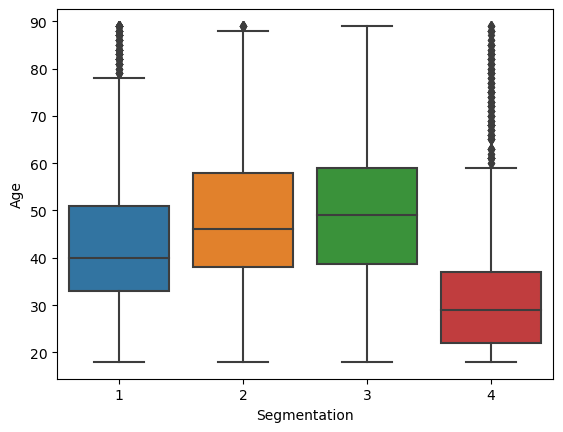

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=data, x='Segmentation', y='Age')
plt.show()

In [208]:
# [5] 크루스칼-왈리스 검정 수행
# 귀무가설 : Segmentation별 Age의 차이가 없다
# 대립가설 : Segmentation별 Age의 차이가 있다

from scipy.stats import kruskal

datas = [x for _, x in groups]

s, pvalue = kruskal(*datas)
print(f'Kruskal Wallis H Test statistics= {s:,.4f}, p-value= {pvalue:,.4f} --> {"H0 기각" if pvalue < 0.05 else "H0 채택"}')

Kruskal Wallis H Test statistics= 1,448.6140, p-value= 0.0000 --> H0 기각


In [214]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc_r = pairwise_tukeyhsd(data['Age'], data['Segmentation'], alpha=0.05)
print(posthoc_r)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     1      2   3.6918   0.0   2.3117   5.0719   True
     1      3   4.9065   0.0   3.5568   6.2562   True
     1      4 -11.4647   0.0 -12.8074 -10.1219   True
     2      3   1.2147 0.099  -0.1447   2.5741  False
     2      4 -15.1565   0.0  -16.509  -13.804   True
     3      4 -16.3712   0.0 -17.6926 -15.0497   True
-----------------------------------------------------


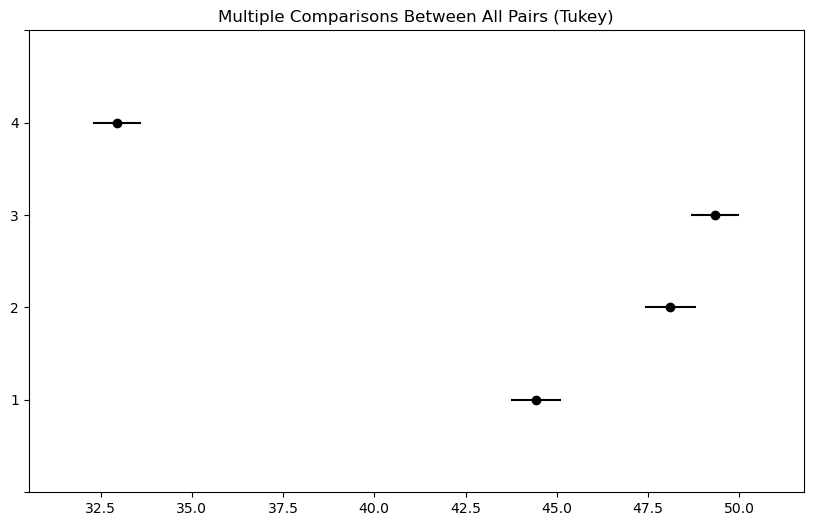

In [216]:
posthoc_r.plot_simultaneous()
plt.show()